# <font color= blue> UCSanDiegoX-s-Data-Science-MicroMasters </font> #
## Week-7 of Course 1-Python For Data Science ##

### MACHINE LEARNING ###

A Machine Learning model is a mathematical model or a parametric function over the inputs. In the general sense, this means that the model has parameters and uses equations to determine the relationship between its inputs and outputs. The parameters are used by the model to modify the inputs to generate the outputs. The model adjusts its parameters in order to correct or refine this input output relationship. The parameters of a Machine Learning model are adjusted or estimated from the data using a learning algorithm
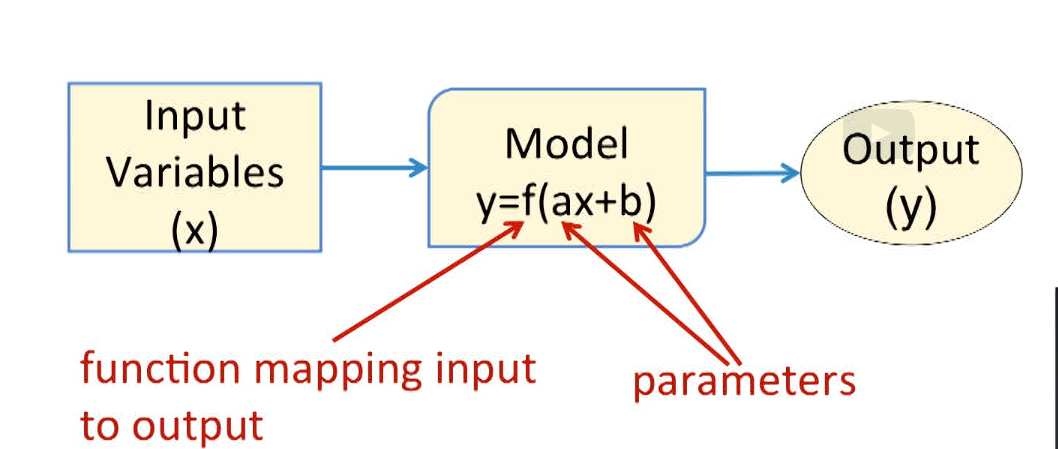

In building a model, we want to adjust the parameters in order to reduce the model's error. Building a classification model then means using the data to adjust a model's parameters in order to form decision boundaries to separate the target classes. In the training phase, the learning algorithm uses the training data to adjust a model's parameters to minimize errors. To adjust a model's parameters, a learning algorithm is applied. kNN stands for K-nearest Neighbors.This technique relies on the notion that samples with similar characteristics, that is samples with similar values for input, likely belong to the same class. Naïve Bayes model uses a probabilistic approach to classification. A Decision Tree is a classification model that uses a tree-like structure to represent multiple decision paths. Traversing each path leads to a different way
to classify an input sample.

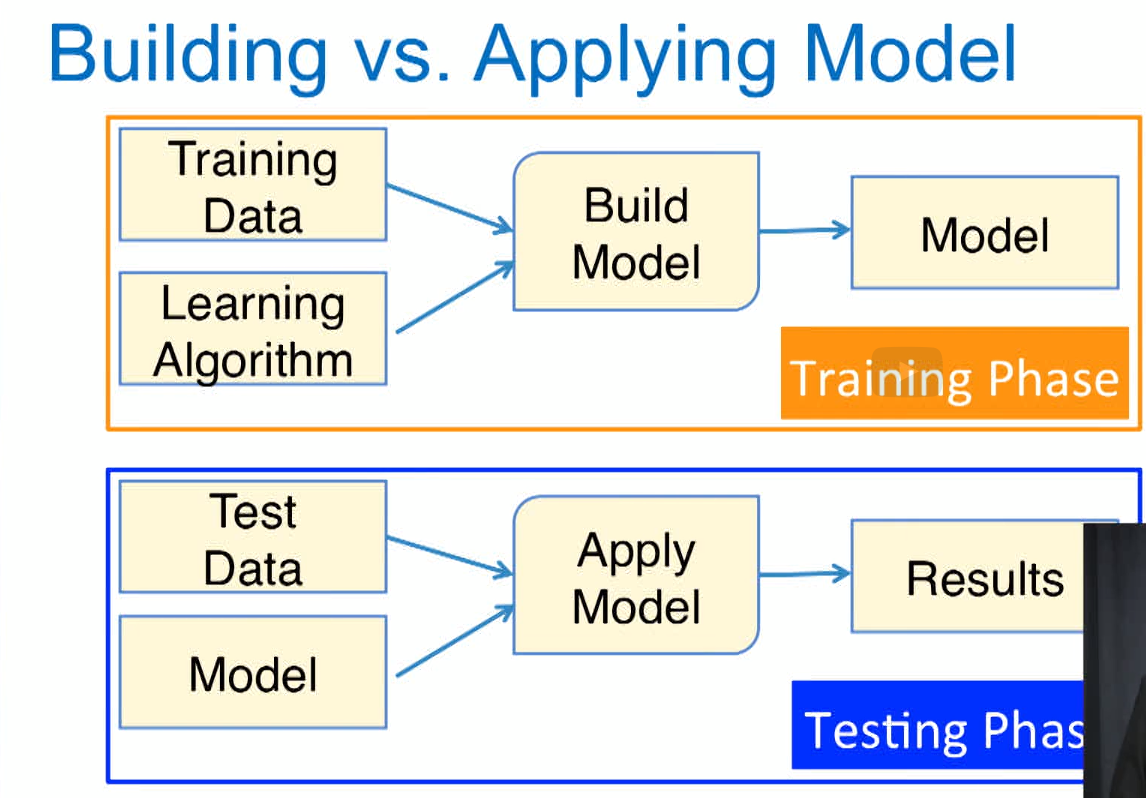

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

Classification of Weather Data <br><br>
using scikit-learn
<br><br>
</p>

### CLASSIFICATION OF WEATHER DATA USING SCIKITLEARN ###
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Daily Weather Data Analysis</p>
In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Importing the Necessary Libraries<br></p>

In [49]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [51]:
data = pd.read_csv('./daily_weather.csv')


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Daily Weather Data Description</p>
<br>
The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

In [52]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [53]:
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


In [54]:
data.corr()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
number,1.000000,-0.029763,0.045170,-0.007649,-0.021932,0.004230,-0.013782,0.007749,-0.002075,-0.025631,-0.018406
air_pressure_9am,-0.029763,1.000000,-0.049252,-0.317073,0.235254,-0.293780,0.252614,-0.091142,-0.105059,-0.431961,-0.479468
air_temp_9am,0.045170,-0.049252,1.000000,-0.024714,-0.286494,-0.088657,-0.283750,-0.214538,-0.266145,-0.587560,-0.497916
avg_wind_direction_9am,-0.007649,-0.317073,-0.024714,1.000000,-0.432951,0.871308,-0.456510,0.125736,0.122559,0.355438,0.393263
avg_wind_speed_9am,-0.021932,0.235254,-0.286494,-0.432951,1.000000,-0.355639,0.995327,0.017727,0.018295,-0.090775,-0.146049
max_wind_direction_9am,0.004230,-0.293780,-0.088657,0.871308,-0.355639,1.000000,-0.379523,0.105140,0.092038,0.377084,0.415220
max_wind_speed_9am,-0.013782,0.252614,-0.283750,-0.456510,0.995327,-0.379523,1.000000,0.019879,0.027406,-0.103995,-0.166554
rain_accumulation_9am,0.007749,-0.091142,-0.214538,0.125736,0.017727,0.105140,0.019879,1.000000,0.734037,0.245571,0.199467
rain_duration_9am,-0.002075,-0.105059,-0.266145,0.122559,0.018295,0.092038,0.027406,0.734037,1.000000,0.316210,0.281781
relative_humidity_9am,-0.025631,-0.431961,-0.587560,0.355438,-0.090775,0.377084,-0.103995,0.245571,0.316210,1.000000,0.883074


In [57]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Data Cleaning Steps<br><br></p>

We will not need to number for each row so we can clean it.

In [58]:
del data['number']

Now let's drop null values using the *pandas dropna* function.

In [67]:
before_rows = data.shape[0]
print(before_rows)

1095


In [68]:
data = data.dropna()

In [69]:
after_rows = data.shape[0]
print(after_rows)

1064


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows dropped due to cleaning?<br><br></p>


In [70]:
before_rows - after_rows

31

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convert to a Classification Task <br><br></p>
Binarize the relative_humidity_3pm to 0 or 1.<br>


In [71]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Target is stored in 'y'.
<br><br></p>


In [72]:
y=clean_data[['high_humidity_label']].copy()
#y

In [73]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [74]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use 9am Sensor Signals as Features to Predict Humidity at 3pm
<br><br></p>


In [76]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [77]:
X = clean_data[morning_features].copy()

In [87]:
X.shape

(1064, 8)

In [78]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [79]:
y.columns

Index(['high_humidity_label'], dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Test and Train split

<br><br></p>



## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.
<img src= "Screenshot from 2023-08-21 16-46-59.png"  align="middle" style="width:550px;height:360px;"/>

<BR>
In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


In [80]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [85]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()

In [86]:
X_train

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
841,918.370000,72.932000,184.500000,2.013246,186.700000,2.773806,0.00,0.0
75,920.100000,53.492000,186.100000,13.444009,193.800000,15.367778,0.00,0.0
95,927.610000,54.896000,55.000000,4.988376,53.400000,7.202947,0.00,0.0
895,919.235153,65.951112,194.343333,2.942019,216.569792,3.658810,0.00,0.0
699,919.888128,68.687822,228.517730,3.960858,247.954028,5.185547,0.00,0.0
...,...,...,...,...,...,...,...,...
276,917.010851,85.719360,116.258670,2.327022,49.729757,3.097945,0.00,0.0
613,919.300000,39.956000,192.100000,1.409272,108.700000,2.192201,0.26,2770.0
934,915.010000,60.602000,179.800000,6.352910,194.500000,7.672704,0.00,0.0
777,916.500000,85.586000,121.100000,1.297425,80.600000,1.744813,0.00,0.0


In [92]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Fit on Train Set
<br><br></p>


In [122]:
#We are trying to fit on the training data set now.We have the humidity classifier and to the decision tree classifier we will set max leaf nodes as 10.So this is our criteria #for the tree induction.
#If you left it as default it would have been unlimited, making it potential over fit the tree to the training data.
#And the random state argument in this algorithm is used for splitting the nodes. Zero here is one of the internal states used to build a decision tree.
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [123]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Predict on Test Set 

<br><br></p>


In [124]:
predictions = humidity_classifier.predict(X_test)

In [125]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [127]:
y_test['high_humidity_label']

456    0
845    0
693    1
259    1
723    1
      ..
46     1
116    0
799    0
350    1
279    0
Name: high_humidity_label, Length: 352, dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [104]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8153409090909091